# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset source:-

https://www.kaggle.com/tejashvi14/employee-future-prediction

In [2]:
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/employee.csv'

--2022-09-07 11:31:41--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/employee.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190593 (186K) [text/plain]
Saving to: ‘employee.csv’

employee.csv        100%[===================>] 186.13K  --.-KB/s    in 0.002s  

2022-09-07 11:31:41 (78.4 MB/s) - ‘employee.csv’ saved [190593/190593]



In [3]:
df_2=pd.read_csv('/content/employee.csv')

In [4]:
df_2.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Let us see know the type of each feature and if there are any null values:

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df_2.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

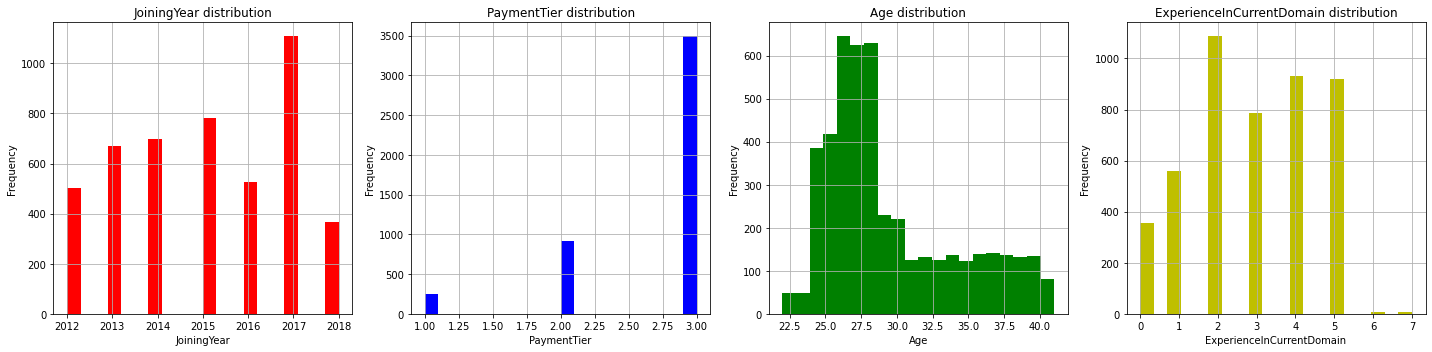

In [7]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5))

df_2['JoiningYear'].hist(bins=20, color='r', ax=ax1)
ax1.set_title('JoiningYear distribution')
ax1.set_xlabel("JoiningYear")
ax1.set_ylabel("Frequency")

df_2['PaymentTier'].hist(bins=20, color='b', ax=ax2)
ax2.set_title('PaymentTier distribution')
ax2.set_xlabel("PaymentTier")
ax2.set_ylabel("Frequency")

df_2['Age'].hist(bins=20, color='g', ax=ax3)
ax3.set_title('Age distribution')
ax3.set_xlabel("Age")
ax3.set_ylabel("Frequency")

df_2['ExperienceInCurrentDomain'].hist(bins=20, color='y', ax=ax4)
ax4.set_title('ExperienceInCurrentDomain distribution')
ax4.set_xlabel("ExperienceInCurrentDomain")
ax4.set_ylabel("Frequency")

f.tight_layout()

Below will be printed the statistical summary of the four features:

In [8]:
(df_2.drop(['LeaveOrNot'], axis=1)).describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
count,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652
std,1.863377,0.561435,4.826087,1.558240
min,2012.000000,1.000000,22.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000
50%,2015.000000,3.000000,28.000000,3.000000
75%,2017.000000,3.000000,32.000000,4.000000
max,2018.000000,3.000000,41.000000,7.000000


In [9]:
for categories in ['Education','City','Gender','EverBenched']:
    print(categories)
    print(df_2[categories].sort_values().unique())
    print('\n')

Education
['Bachelors' 'Masters' 'PHD']


City
['Bangalore' 'New Delhi' 'Pune']


Gender
['Female' 'Male']


EverBenched
['No' 'Yes']




Based on the values contained in each categorical feature we can now say that all of our features are correct and does not contain any invalid value, it would be nice if we print as pie charts the proportion of each class in the features:

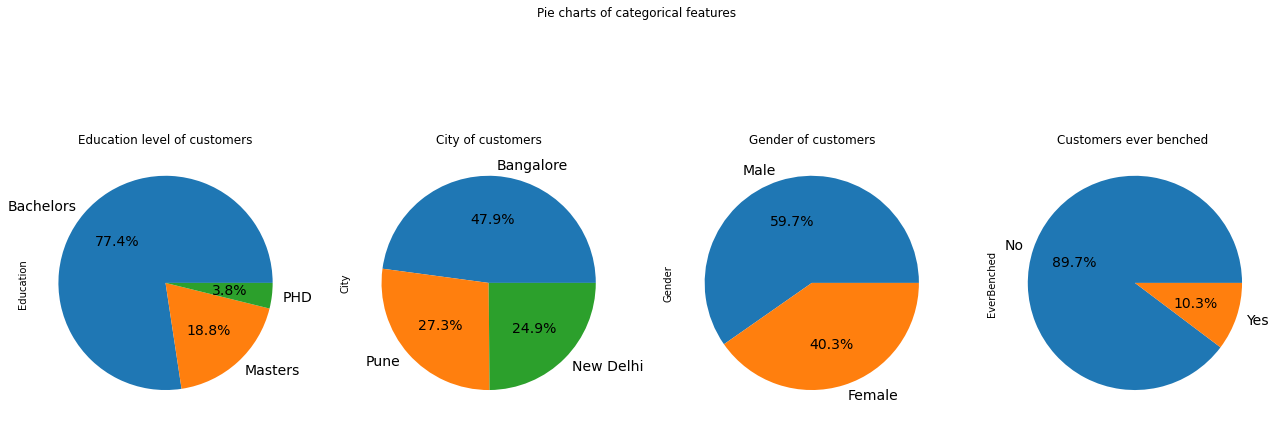

In [10]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(18,8))

pie1=pd.DataFrame(df_2['Education'].value_counts())
pie1.reset_index(inplace=True)
pie1.plot(kind='pie', title='Education level of customers',y = 'Education', 
             autopct='%1.1f%%', shadow=False, labels=pie1['index'], legend = False, fontsize=14, ax=ax1)

pie2=pd.DataFrame(df_2['City'].value_counts())
pie2.reset_index(inplace=True)
pie2.plot(kind='pie', title='City of customers',y = 'City', 
             autopct='%1.1f%%', shadow=False, labels=pie2['index'], legend = False, fontsize=14, ax=ax2)

pie3=pd.DataFrame(df_2['Gender'].value_counts())
pie3.reset_index(inplace=True)
pie3.plot(kind='pie', title='Gender of customers',y = 'Gender', 
             autopct='%1.1f%%', shadow=False, labels=pie3['index'], legend = False, fontsize=14, ax=ax3)

pie4=pd.DataFrame(df_2['EverBenched'].value_counts())
pie4.reset_index(inplace=True)
pie4.plot(kind='pie', title='Customers ever benched ',y = 'EverBenched', 
             autopct='%1.1f%%', shadow=False, labels=pie4['index'], legend = False, fontsize=14, ax=ax4)

f.suptitle('Pie charts of categorical features')
f.tight_layout()

# Feature Engineering:

Encoding:

We have 2 types of categorical features: Binary and nominal, as we know those binary can take values either 1 or 0, whereas nominal ones must be one-hot encoded using get_dummies.



In [11]:
df_2.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Binarizing Gender and EverBenched features:

In [12]:
df_2['Gender']=df_2['Gender'].replace('Male',1).replace('Female',0)

In [13]:
df_2['EverBenched']=df_2['EverBenched'].replace('Yes',1).replace('No',0)

One-hot encoding of City and Education features:

In [14]:
cat_features=['City', 'Education']
df_2 = pd.get_dummies(df_2, columns=cat_features, drop_first=True) #To avoid multicollinearity

Above I specified drop_first=True in order to omit one of the classes, because that one is equivalent when all classes are 0, this method applied to datasets with hundreds of categorical features helps to reduce the curse of dimentionality.

In [15]:
df_2

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Education_Masters,Education_PHD
0,2017,3,34,1,0,0,0,0,0,0,0
1,2013,1,28,0,0,3,1,0,1,0,0
2,2014,3,38,0,0,2,0,1,0,0,0
3,2016,3,27,1,0,5,1,0,0,1,0
4,2017,3,24,1,1,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,0,4,0,0,0,0,0
4649,2013,2,37,1,0,2,1,0,1,1,0
4650,2018,3,27,1,0,5,1,1,0,1,0
4651,2012,3,30,1,1,2,0,0,0,0,0


In [16]:
label=df_2['LeaveOrNot']

In [17]:
df_2.drop(['LeaveOrNot'], axis=1, inplace=True)

In [18]:
df_2

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,City_New Delhi,City_Pune,Education_Masters,Education_PHD
0,2017,3,34,1,0,0,0,0,0,0
1,2013,1,28,0,0,3,0,1,0,0
2,2014,3,38,0,0,2,1,0,0,0
3,2016,3,27,1,0,5,0,0,1,0
4,2017,3,24,1,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,0,4,0,0,0,0
4649,2013,2,37,1,0,2,0,1,1,0
4650,2018,3,27,1,0,5,1,0,1,0
4651,2012,3,30,1,1,2,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, label_train, label_val = train_test_split(df_2, label, test_size=0.20, random_state=42)

In [21]:
X_train.shape, label_train.shape, X_val.shape, label_val.shape

((3722, 10), (3722,), (931, 10), (931,))

In [22]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_scaled = s.fit_transform(X_train)
X_val_scaled = s.transform(X_val)

# Modeling

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train_scaled, label_train)

In [24]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=15, cv=4, penalty='l1', solver='liblinear').fit(X_train_scaled, label_train)  #C=10

In [25]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=15, cv=4, penalty='l2', solver='liblinear').fit(X_train_scaled, label_train)  #C=10

In [26]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_val_scaled), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_val_scaled).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0


In [27]:
y_prob.head()

,lr,l1,l2
0,0.556231,0.556377,0.556459
1,0.721852,0.721966,0.721222
2,0.567925,0.567979,0.567150
3,0.784500,0.784419,0.783461
4,0.886741,0.886903,0.885789


Below we are displaying all rows which have different predicted classes by models "lr != l1", We can see this for all columns in a better way ploting confusion matrix.

In [28]:
y_pred[y_pred['lr']!=y_pred['l1']] 

,lr,l1,l2
517,1,0,0


## Computing error metrics:

We could see in detail the error metrics for the 3 models by using classification report:

In [29]:
from sklearn.metrics import classification_report
print('Classification report for Logistic regression without regularization:')
print(classification_report(label_val,y_pred['lr']))

print('Classification report for Logistic regression with L1(Lasso) regularization:')
print(classification_report(label_val,y_pred['l1']))
    
print('Classification report for Logistic regression with L2(Ridge) regularization:')
print(classification_report(label_val,y_pred['l2']))

Classification report for Logistic regression without regularization:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       610
           1       0.71      0.44      0.54       321

    accuracy                           0.75       931
   macro avg       0.73      0.67      0.68       931
weighted avg       0.74      0.75      0.73       931

Classification report for Logistic regression with L1(Lasso) regularization:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       610
           1       0.71      0.44      0.54       321

    accuracy                           0.74       931
   macro avg       0.73      0.67      0.68       931
weighted avg       0.74      0.74      0.73       931

Classification report for Logistic regression with L2(Ridge) regularization:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       610
           1 

In order to summarize and average the values obtained we will do the following:

In [30]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function, we will average them because we will have one value per class
    precision, recall, fscore, _ = score(label_val, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(label_val, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(label_val, classes=[0,1]),
                        label_binarize(y_pred[lab], classes=[0,1]), 
                        average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(label_val, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [31]:
metrics

,lr,l1,l2
precision,0.739845,0.738668,0.737487
recall,0.745435,0.744361,0.743287
fscore,0.726927,0.725556,0.724182
accuracy,0.745435,0.744361,0.743287
auc,0.672905,0.671347,0.669790


In the table above we don't see a difference statistically significant in the error metrics for the 3 models, even just using the first one (without regularization) we can expect to perform moderately good at predicting if the employee will leave or not. In order to see a difference a bit more highlighted we could plot their corresponding confusion matrix as following:

## Displaying the confusion matrix for each model:

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

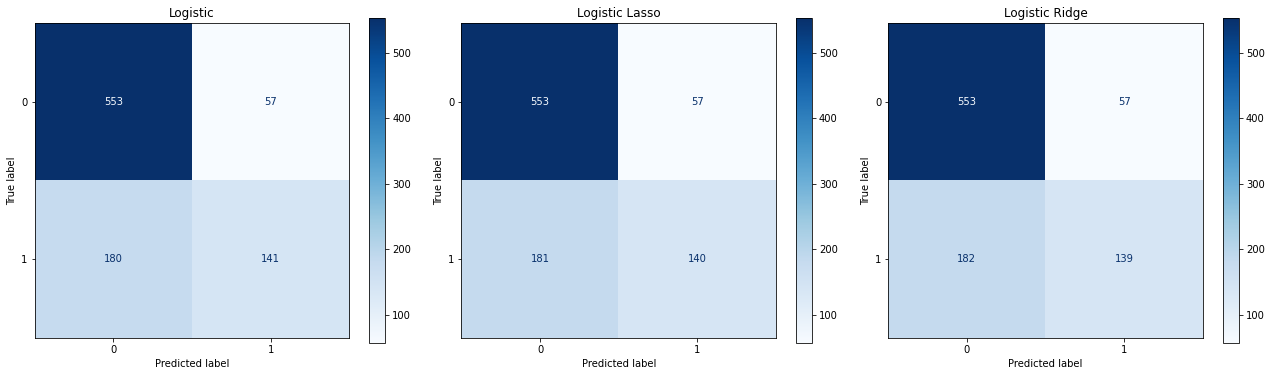

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm['lr'], display_labels=lr.classes_)
disp1.plot(cmap='Blues', ax=ax1)
ax1.set_title('Logistic')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm['l1'], display_labels=lr.classes_)
disp2.plot(cmap='Blues', ax=ax2)
ax2.set_title('Logistic Lasso')

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm['l2'], display_labels=lr.classes_)
disp3.plot(cmap='Blues', ax=ax3)
ax3.set_title('Logistic Ridge')

#f.suptitle('Confusion matrix of models')
f.tight_layout()

In [34]:
pd.DataFrame(label).value_counts()

LeaveOrNot
0             3053
1             1600
dtype: int64

Firstly, what is worrying the most if the absolute ineffience for classifying class 1 correctly, this is why the recall for such class was so low, whereas for class 0 is worked much better, but such bias towards predicting more class 0 can make us think logistic regression is not the best model to predict given this dataset, therefore a different approach such as Catboost or XGBoost Classifiers could be used and expect a significantly better performance. Another challenge to face is to balance the data because class 0 has double the instances than class 1 which clearly sidetracks the prediction, so a method different to SMOTE (which was used and had the same performance) should be used to improve the prediction.